# Co-Vid19 Data Science Team Project
## Jason Lubrano, Andrea Chamorro
### University of Colorado Boulder, Department of Computer Science

In [1]:
# imports
import numpy as np 
from scipy import stats
import statistics
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

In [27]:
# first off, watermelon oreos are the best flavor no matter what the statistics say
dfCOVID = pd.read_csv("latestdata.csv")

dfCOVID.dropna(subset=['age', 'sex', 'city', 'country'], inplace = True)

covidColors = [
    '#3db7e4', # blue
    '#ccd663', # yellow-green
    '#262626', # black-ish
    '#e85f35', # orange
    '#7bc74c', # green
]

dfCOVID.drop_duplicates(inplace=True)

/home/gnomy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,2,10,11,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
dfCOVID.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
1,000-1-,50-59,male,Snohomish County,Washington,United States,1.0,48.04818,-121.6960,admin2,...,NaN,NaN,NaN,NaN,Snohomish County,Washington,United States,2988,NaN,NaN
7,000-1-,60-69,female,Snohomish County,Washington,United States,1.0,48.04818,-121.6960,admin2,...,NaN,NaN,NaN,NaN,Snohomish County,Washington,United States,2988,NaN,NaN
8,000-1-,50-59,male,Snohomish County,Washington,United States,1.0,48.04818,-121.6960,admin2,...,NaN,NaN,NaN,NaN,Snohomish County,Washington,United States,2988,NaN,NaN
9,000-1-,30-39,female,Snohomish County,Washington,United States,1.0,48.04818,-121.6960,admin2,...,NaN,NaN,NaN,NaN,Snohomish County,Washington,United States,2988,NaN,NaN
11,000-1-1,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,...,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN


In [29]:
countryCounts = dfCOVID.groupby("country")['ID'].count()

countryCounts = countryCounts.to_frame()

countries = list(countryCounts.index.values.tolist()) 

countryCounts['countries'] = countries

countryCounts.head()

,ID,countries
country,,
Argentina,19,Argentina
Australia,102,Australia
Belgium,1,Belgium
Bhutan,1,Bhutan
Brazil,409,Brazil


In [30]:
def graph_covid_country_data():
    # Make Scatterplot 
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(24,14))
    
    ax.scatter(
        countryCounts['countries'],
        countryCounts['ID'],
        color = covidColors[2],
        edgecolor = covidColors[3],
        s=100,
        alpha=0.5
    )

    ax.set_xlabel(
        "Country",
        fontsize=16,
        color=covidColors[3],
    )
    ax.set_ylabel(
        "Count",
        fontsize=16,
        color=covidColors[3],
    )
    ax.set_title(
        'Co-Vid19 by Country Count',
        fontsize=24,
        color=covidColors[3],
    )
    ax.grid(
        alpha=0.25,
        color=covidColors[2],
    )
    
    ax.set_axisbelow(
        True
    )
    
    ax.set_xticklabels(
        countryCounts['countries'],
        rotation=45
    )

    plt.legend()
    plt.show()

No handles with labels found to put in legend.


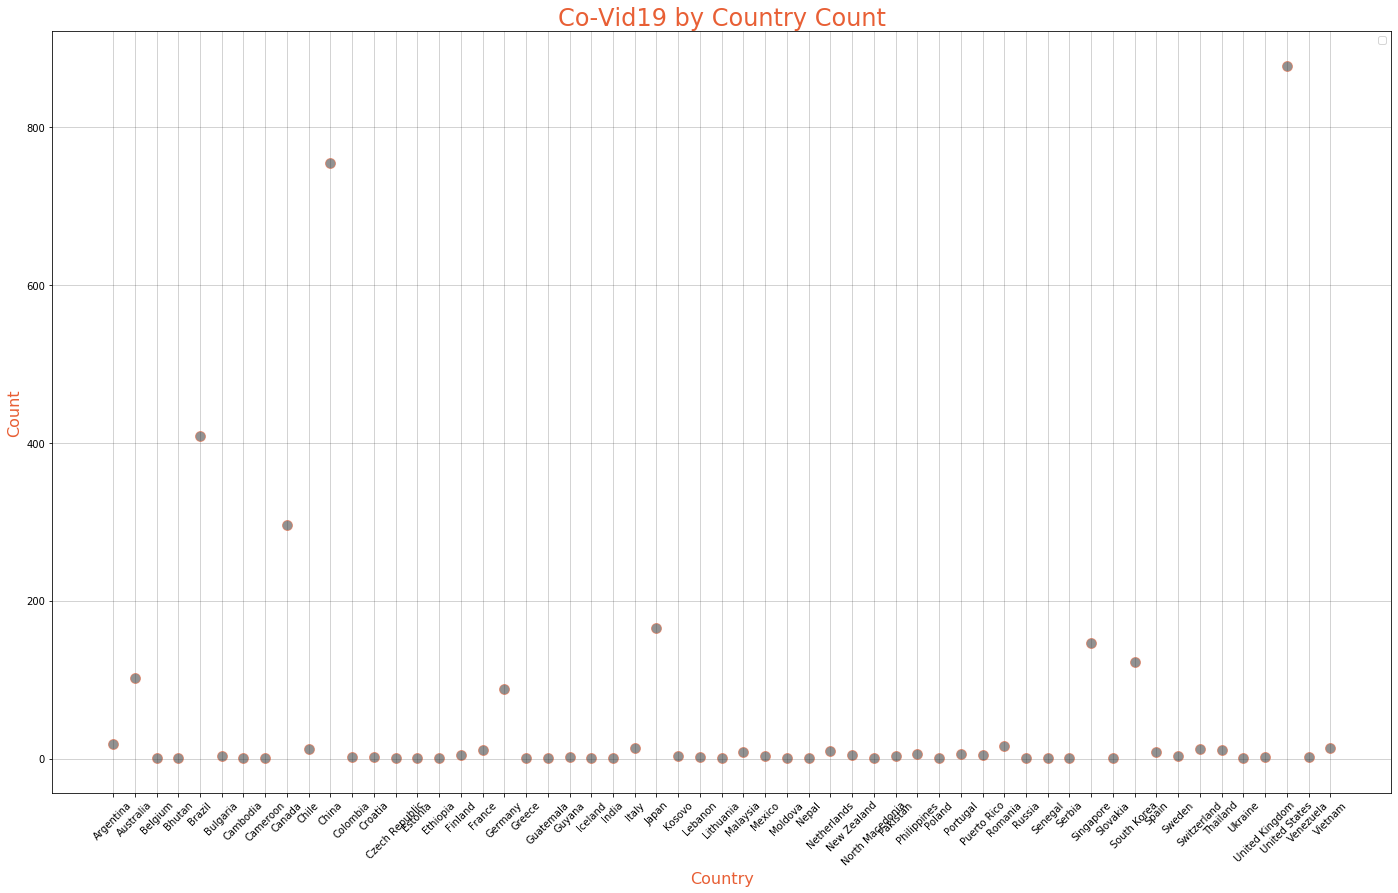

In [31]:
graph_covid_country_data()

# HEATMAPPING
## FOLIUM

In [165]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# boulder's lats and longs
boulderCO = [40.0150, -105.2705]
# lets get a map up and going
covidMap = folium.Map([boulderCO[0], boulderCO[1]], zoom_start=11)
covidMap

In [158]:
dfCOVID.dropna(subset=['latitude', 'longitude', 'city'], inplace = True)

cityCounts = dfCOVID.groupby("city")['ID'].count()

cityCounts = cityCounts.to_frame()

cities = list(cityCounts.index.values.tolist()) 

cityCounts['cities'] = cities

cityCounts.head()

,ID,cities
city,,
Ada County,1,Ada County
Adams County,2,Adams County
Adelaide,7,Adelaide
"Aegean Bay, Oriental Plaza, Economic Development Zone, Changchun",1,"Aegean Bay, Oriental Plaza, Economic Developme..."
Ajax,2,Ajax


In [159]:
cityCounts['count'] = cityCounts["ID"]
cityCounts = cityCounts.drop(columns=["ID"])

In [160]:
cityCounts.head()

,cities,count
city,,
Ada County,Ada County,1
Adams County,Adams County,2
Adelaide,Adelaide,7
"Aegean Bay, Oriental Plaza, Economic Development Zone, Changchun","Aegean Bay, Oriental Plaza, Economic Developme...",1
Ajax,Ajax,2


In [161]:
cityCountArr = []

def fillCities():
    cityArr = []
    for index, row in dfCOVID.iterrows():
        for i in range(len(cityCounts['cities'])):
            if(row['city'] == cityCounts['cities'][i]):
                cityArr.append(cityCounts['count'][i])
    print("done")
    return cityArr
cityCountArr = fillCities()

done


In [162]:
dfCOVID['cityCount'] = cityCountArr

In [167]:
for index, row in dfCOVID.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=float(row['cityCount']),
                        # radius=15,
                        popup=('City: ' + str(row['city']).capitalize() + '<br>'
                              'Count: ' + str(row['cityCount'])
                              ),
                        fill_color="#3db7e4",
                       ).add_to(covidMap)

In [168]:
# convert to (n, 2) nd-array format for heatmap
covidArray = dfCOVID[['latitude', 'longitude']].as_matrix()

# plot heatmap
covidMap.add_children(plugins.HeatMap(covidArray, radius=15))
covidMap

/home/gnomy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/gnomy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """
